In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Data 

In [5]:
data = pd.read_csv('Global_Superstore2.csv',encoding="latin-1")
data.shape

(51290, 24)

In [7]:
# Removing irrelevant columns
df = data.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name',
              'Postal Code', 'Product ID', 'Product Name'], axis = 1)
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Mode       51290 non-null  object 
 2   Segment         51290 non-null  object 
 3   City            51290 non-null  object 
 4   State           51290 non-null  object 
 5   Country         51290 non-null  object 
 6   Market          51290 non-null  object 
 7   Region          51290 non-null  object 
 8   Category        51290 non-null  object 
 9   Sub-Category    51290 non-null  object 
 10  Sales           51290 non-null  float64
 11  Quantity        51290 non-null  int64  
 12  Discount        51290 non-null  float64
 13  Profit          51290 non-null  float64
 14  Shipping Cost   51290 non-null  float64
 15  Order Priority  51290 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 6.3+ MB


In [8]:
df.head()

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,05-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,17-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,28-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,05-11-2013,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical


### Monthly sales for all categories 

### Correlation among numerical features 

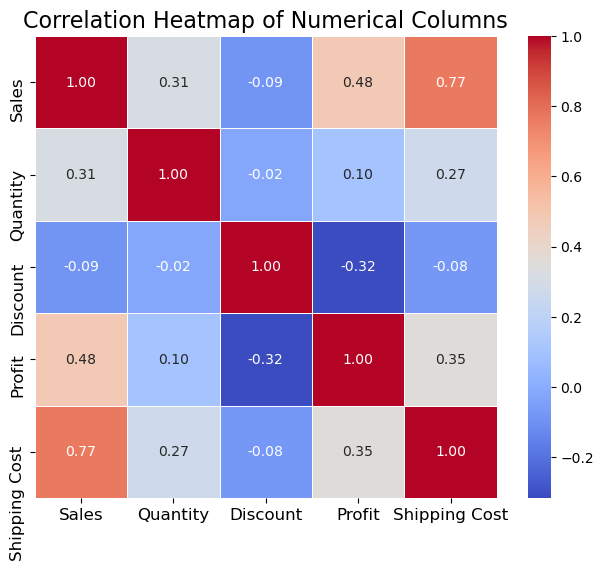

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
numerical_df = df[numerical_columns]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)

plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


CORRELATION PLOTS

ENCODING CATEGORICAL VARIABLES WITH LOWER CARDINALITY

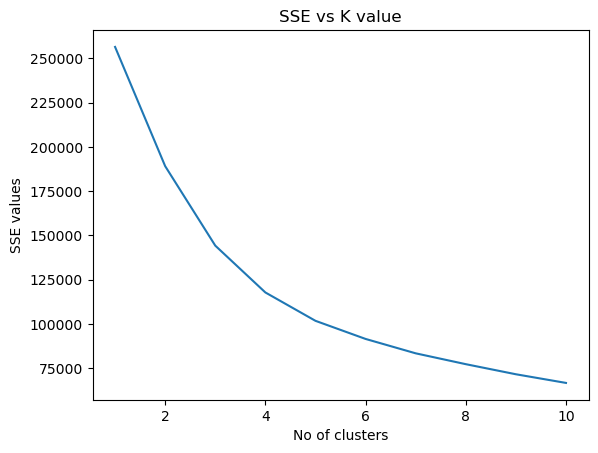

In [64]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# Select relevant features
selected_features = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

# Create a new DataFrame with selected features
customer_data = df[selected_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Number of clusters first
sse = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k, n_init=10)
    k_means.fit(scaled_data)  # Use fit instead of fit_predict
    sse.append(k_means.inertia_)
    
    
plt.plot(range(1,11),sse)
plt.xlabel("No of clusters")
plt.ylabel("SSE values")
plt.title("SSE vs K value")
plt.show()

In [63]:
print(sse)

[256450.0000000002, 189076.6764939436, 144172.98670558134, 117711.54979811853, 101685.31431697556, 91451.68527100785, 83325.61864256005, 77182.24044054134, 71480.0966897529]


In [65]:
# Choose the number of clusters (K)
k = 4

# Apply K-means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\91914\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
df.head()

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cluster
0,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical,1
1,05-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical,1
2,17-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium,1
3,28-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium,1
4,05-11-2013,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical,1


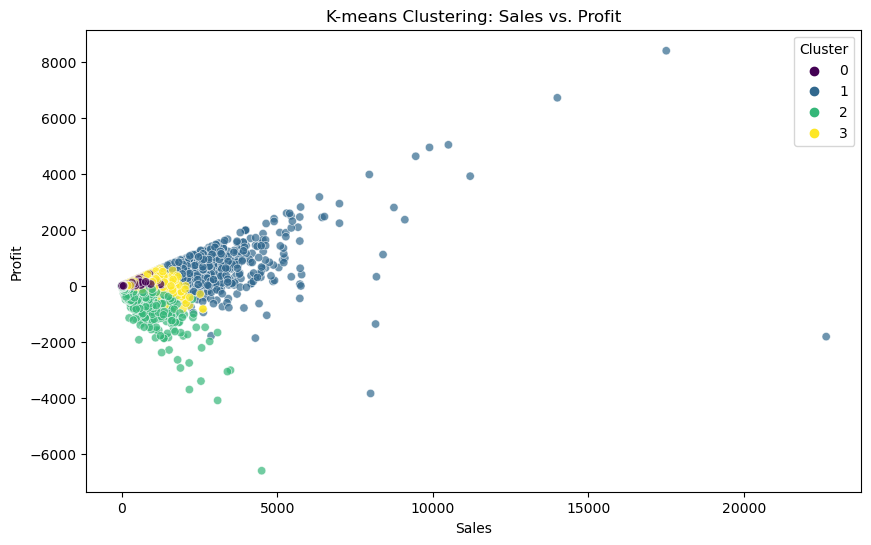

In [68]:

# Scatter plot for 'Sales' and 'Profit' colored by clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('K-means Clustering: Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


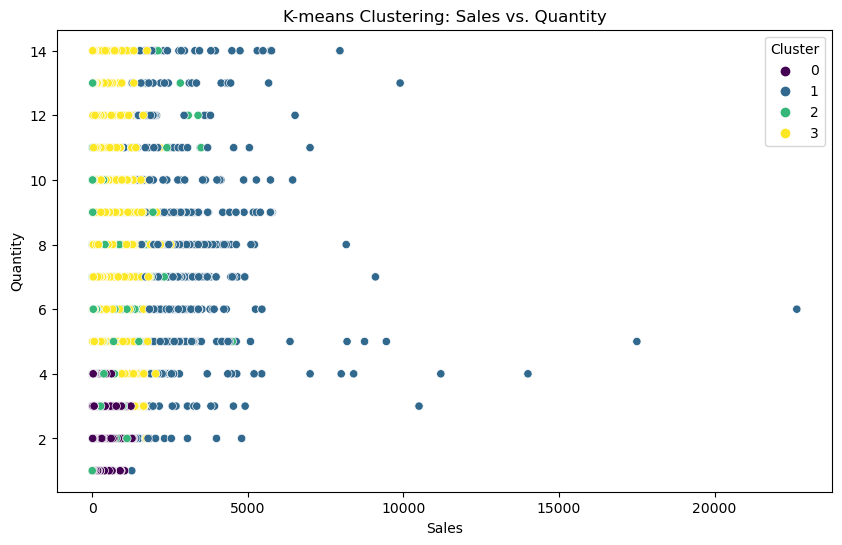

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Quantity', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering: Sales vs. Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.show()

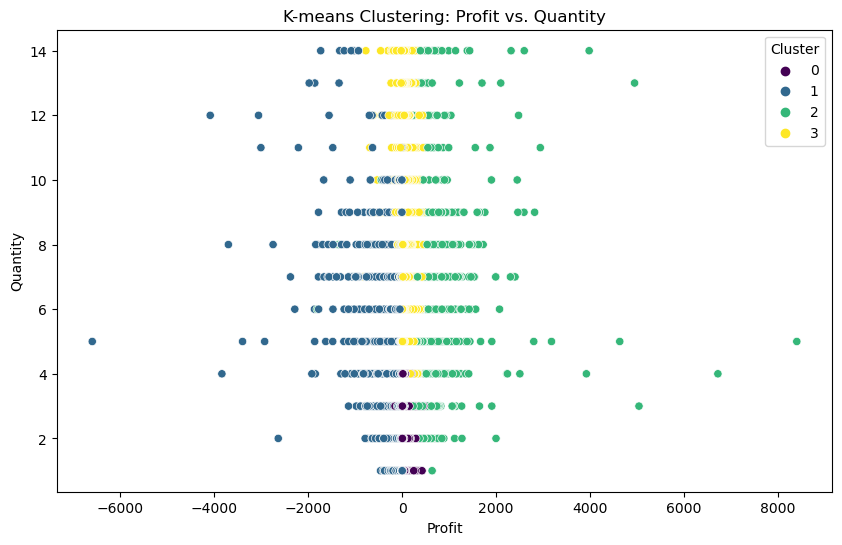

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profit', y='Quantity', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering: Profit vs. Quantity')
plt.xlabel('Profit')
plt.ylabel('Quantity')
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

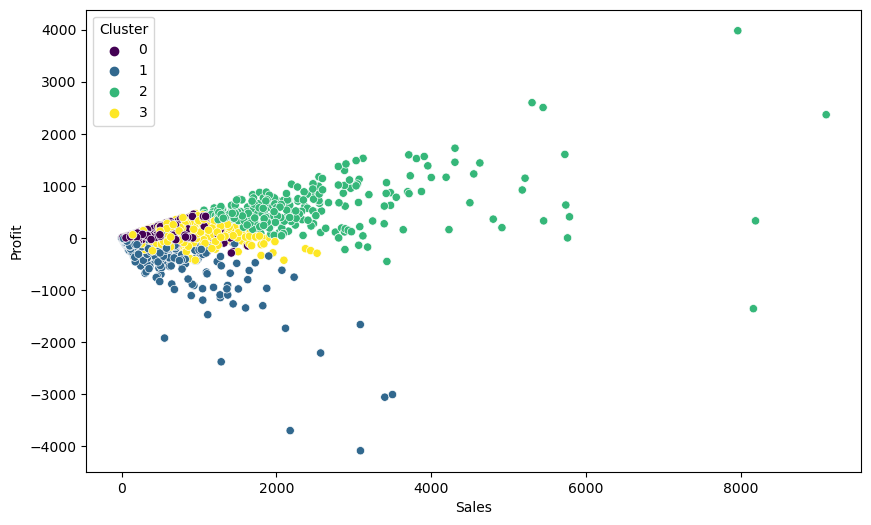

In [15]:
sampled_df = df.sample(frac=0.2)  # Adjust the fraction as needed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=sampled_df, palette='viridis')


<Axes: xlabel='Sales', ylabel='Profit'>

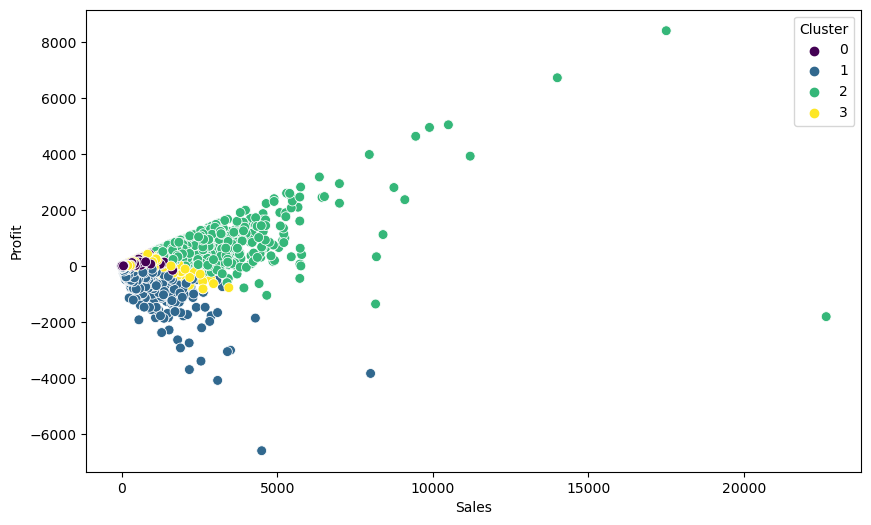

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=df, palette='viridis', s=50)  # Adjust 's' for marker size


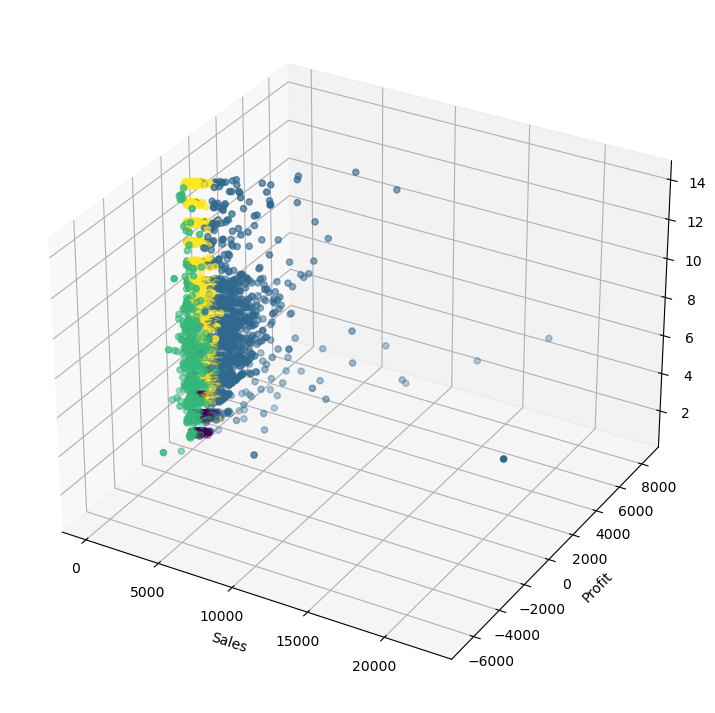

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Sales'], df['Profit'], df['Quantity'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Quantity', labelpad=25)  # Adjust labelpad to move the label away from the data points

plt.show()


In [22]:
c1 = df[df['Cluster'] == 0]
c2 = df[df['Cluster'] == 1]
c3 = df[df['Cluster'] == 2]
c4 = df[df['Cluster'] == 3]

In [23]:
print(c1.shape,c2.shape,c3.shape,c4.shape)

(28806, 17) (10023, 17) (1380, 17) (11081, 17)


In [24]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


               Sales  Quantity  Discount      Profit  Shipping Cost
Cluster                                                            
0         147.825958  2.325071  0.041970   29.418761      16.242931
1         140.713386  3.056370  0.525224  -77.714225      15.225214
2        2277.053467  6.088406  0.046852  584.692383     228.949138
3         345.774146  6.524682  0.071454   53.431518      37.575552


C:\Users\91914\AppData\Local\Temp\ipykernel_23684\522821239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


In [ ]:
#Based on the cluster characteristics, we can name them the following
"""
Cluster 0: 
"Stable Performers"
Moderate sales and quantity.
Low discount.
Positive profit.
Moderate shipping cost.

Cluster 1: "High Achievers"
High sales and quantity.
Moderate discount.
High profit.
High shipping cost.

Cluster 2: "Challenged Margins"
Low sales and moderate quantity.
High discount.
Negative profit.
Moderate shipping cost.

Cluster 3: "Balanced Growth"
Moderate to high sales and quantity.
Low to moderate discount.
Positive profit.
Moderate shipping cost."""

In [1]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Sales', data=sampled_df)

# Add cluster names to the plot
cluster_names = {
    0: "Stable Performers",
    1: "High Achievers",
    2: "Challenged Margins",
    3: "Balanced Growth"
}

plt.title('Sales Distribution Across Clusters')

# Using the cluster names dictionary to set legend labels
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cluster_names[i], 
                      markerfacecolor=sns.color_palette()[i], markersize=10) for i in range(len(cluster_names))]
plt.legend(handles=handles)

plt.show()

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Sales Distribution Across Clusters')

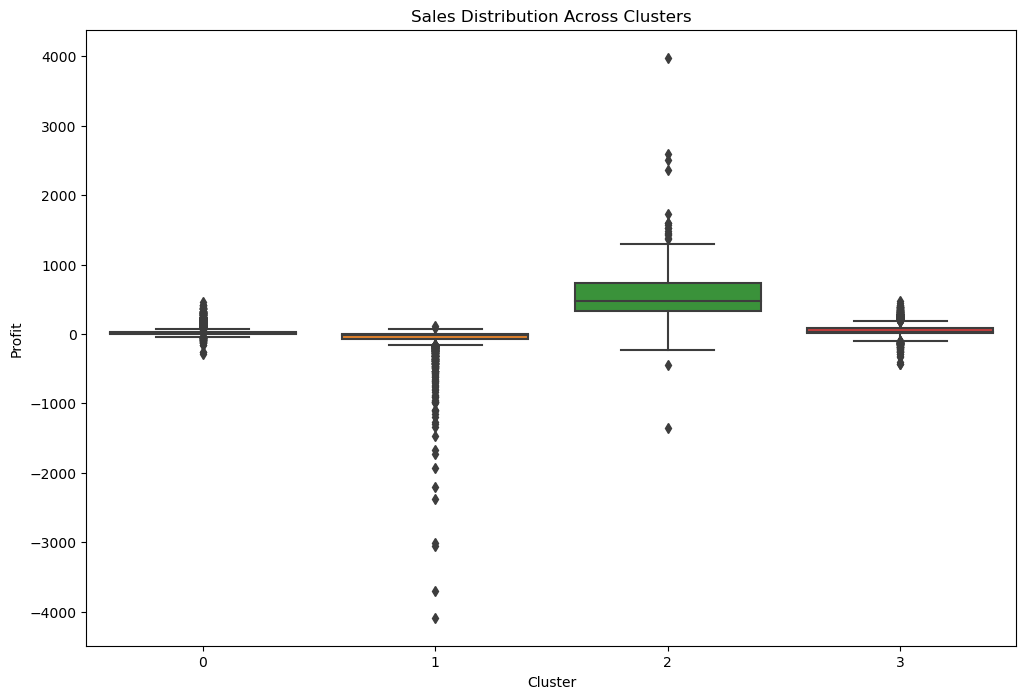

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Profit', data=sampled_df)

plt.title('Profit Distribution Across Clusters')

plt.legend(handles=handles)

plt.show()

Text(0.5, 1.0, 'Sales Distribution Across Clusters')

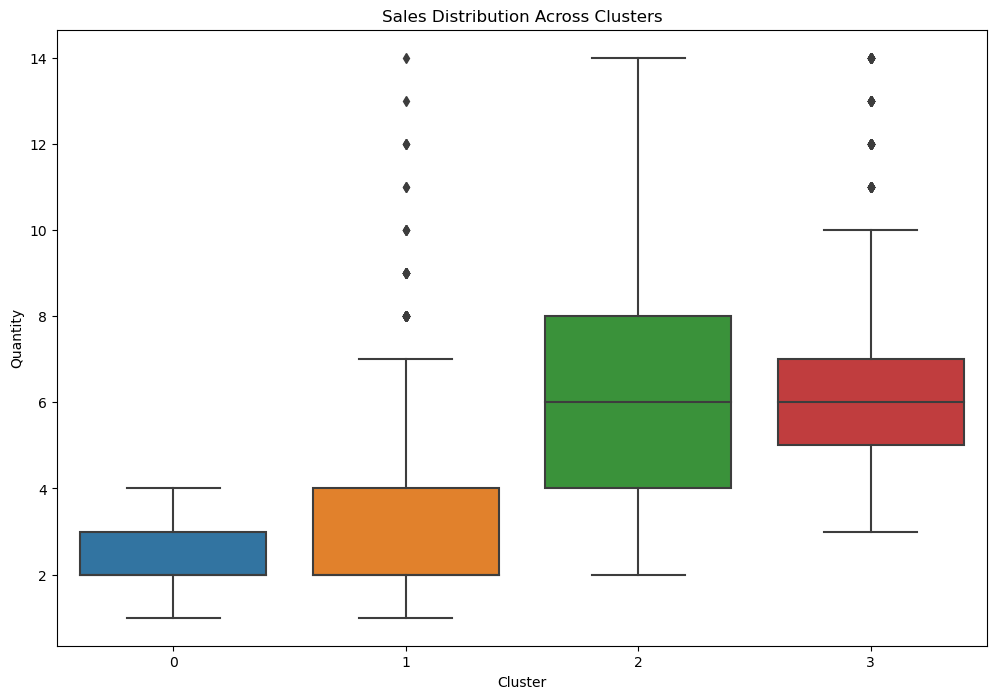

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Quantity', data=sampled_df)

plt.title('Quantity Distribution Across Clusters')

plt.legend(handles=handles)

plt.show()

Text(0.5, 1.0, 'Sales Distribution Across Clusters')

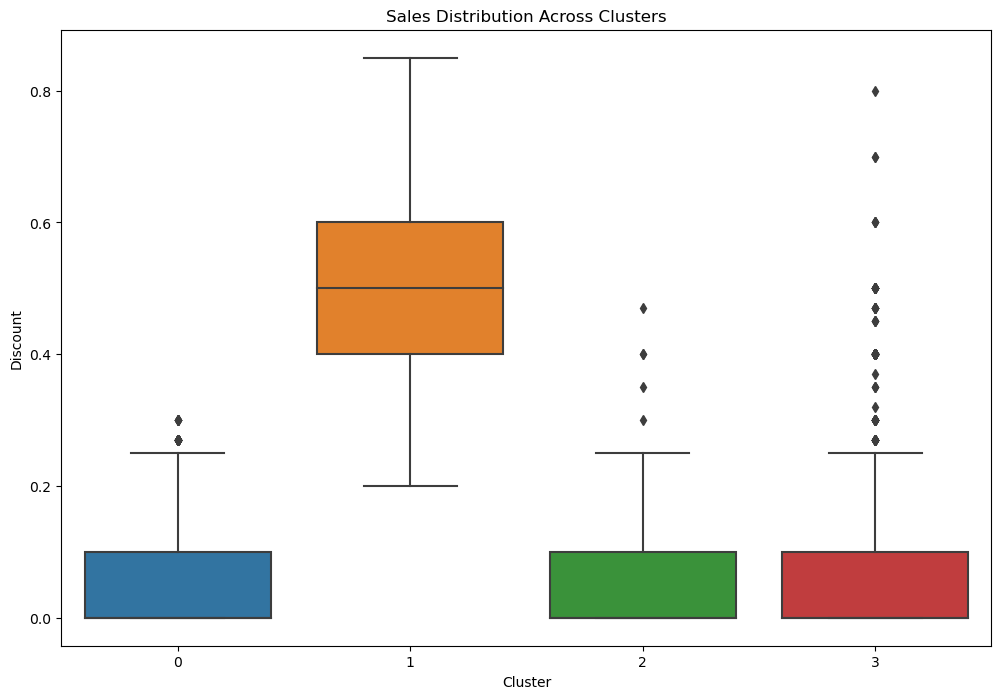

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Discount', data=sampled_df)

plt.title('Discount Distribution Across Clusters')

plt.legend(handles=handles)

plt.show()

In [44]:
###Now decision trees
df['Cluster'].unique()

array([2, 1, 3, 0])